# Mandelbrot with colour

Here we try and plot the Mandelbrot curve complete with the background colours.

In [10]:
# The usual imports

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [4]:
# Function for calculating how quickly a point diverges

def mandelbrot(h: float, w: float, max_iter: int):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

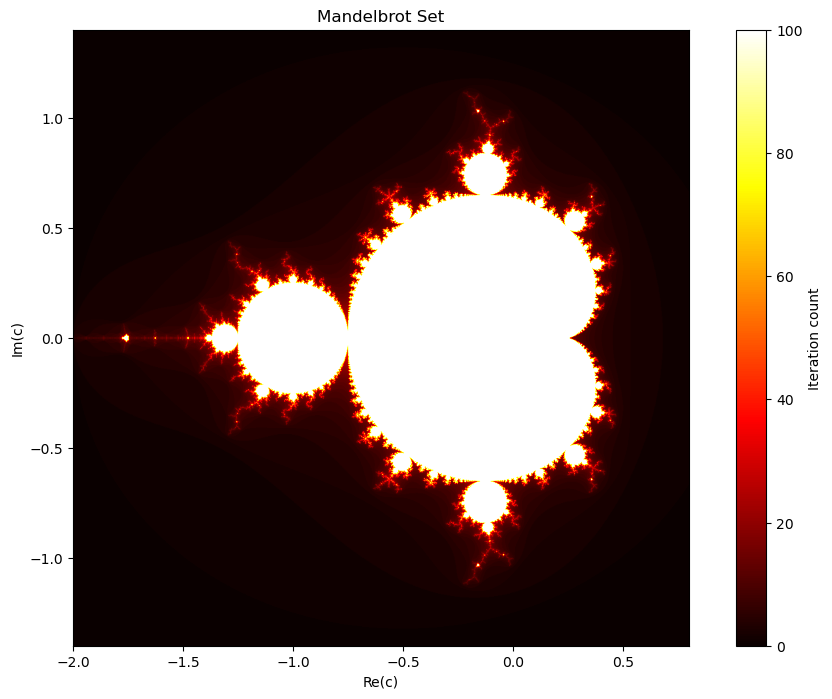

In [7]:
# Creates a plot from the above

h, w = 1000, 1500
max_iter = 100

plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot(h, w, max_iter), cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iteration count')
plt.show()

For an even more colourful plot we try some slightly different code below.

In [8]:
# Function for obtaining the fractal.

def julia_set(h: float, w: float, max_iter: int, c: complex):
    y, x = np.ogrid[-1.5:1.5:h*1j, -2:2:w*1j]
    z = x + y*1j
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

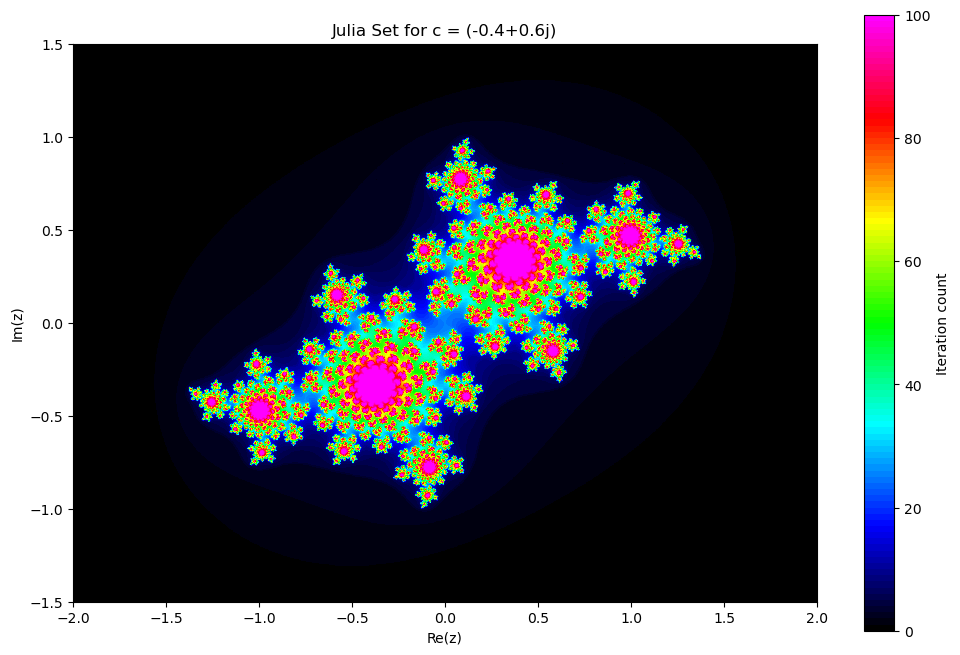

In [9]:
# Creates a plot using the above

h, w = 1000, 1500
max_iter = 100
c = -0.4 + 0.6j  # This value determines the specific Julia set

plt.figure(figsize=(12, 8))
julia = julia_set(h, w, max_iter, c)

# Custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['#000000', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF0000', '#FF00FF']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

plt.imshow(julia, cmap=cmap, extent=[-2, 2, -1.5, 1.5])
plt.title(f'Julia Set for c = {c}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.colorbar(label='Iteration count')
plt.show()

We try this again reverting to the original Madelbrot set.

In [11]:
# The function for geenrating the plot

def mandelbrot(h: float, w: float, max_iter: int):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

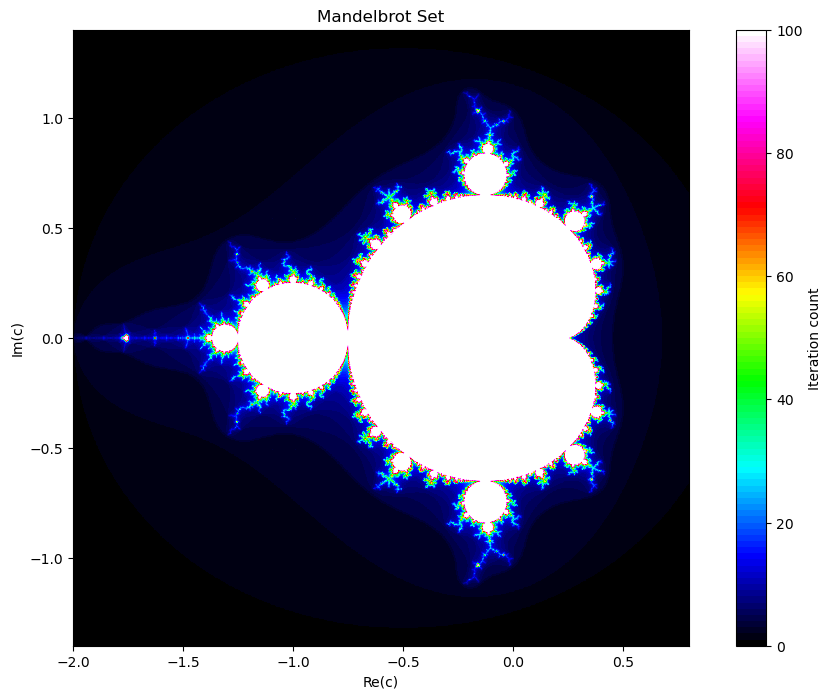

In [12]:
# Produces a plot from the above

h, w = 1000, 1500
max_iter = 100

# Generate Mandelbrot set
mandelbrot_set = mandelbrot(h, w, max_iter)

# Create custom colormap
colors = ['#000000', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF0000', '#FF00FF', '#FFFFFF']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Plot
plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot_set, cmap=cmap, extent=[-2, 0.8, -1.4, 1.4])
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iteration count')
plt.show()